# Download Chicago's Reported Crime Data

## Spark Setup Environment

In [3]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:12 https://developer.download.nvidia.com/compute/machine-lear

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [5]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2019-12-08 15:36:41--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [     <=>            ]   1.54G  2.91MB/s    in 9m 14s  

2019-12-08 15:45:55 (2.85 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1656030457]



In [6]:
!ls

'rows.csv?accessType=DOWNLOAD'	 spark-2.3.1-bin-hadoop2.7
 sample_data			 spark-2.3.1-bin-hadoop2.7.tgz


In [0]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv  

In [10]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

## Schema

In [15]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [0]:
from pyspark.sql.types import StructField, StructType, StringType, BooleanType, IntegerType, TimestampType, DoubleType

In [14]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [0]:
labels = [('ID', StringType()),
        ('Case Number', StringType()),
        ('Date', TimestampType()),
        ('Block', StringType()),
        ('IUCR', StringType()),
        ('Primary Type', StringType()),
        ('Description', StringType()),
        ('Location Description', StringType()),
        ('Arrest', StringType()),
        ('Domestic', BooleanType()),
        ('Beat', StringType()),
        ('District', StringType()),
        ('Ward', StringType()),
        ('Community Area', StringType()),
        ('FBI Code', StringType()),
        ('X Coordinate', StringType()),
        ('Y Coordinate', StringType()),
        ('Year', IntegerType()),
        ('Updated On', StringType()),
        ('Latitude', DoubleType()),
        ('Longitude', DoubleType()),
        ('Location', StringType())]

In [0]:
schema = StructType([StructField(x[0], x[1], True) for x in labels])

In [25]:
rc = spark.read.csv('reported-crimes.csv', schema = schema)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [26]:
rc.show(5)

+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|null|       null|null| null|null|        null|       null|                null|  null|    null|null|    null|null|          null|    null|        null|        null|null|      null|    null|     null|    null|
|null|       null|null| null|null|        null|       null|                null|  null|    null|null|    null|null|          null|    null|        null|        

That shows that some columns cannot be converted to the given type.

In [28]:
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [29]:
rc.select('Case Number', 'Date', 'year').show(5)

+-----------+-------------------+----+
|Case Number|               Date|year|
+-----------+-------------------+----+
|   JA366925|2001-01-01 11:00:00|2001|
|   JB147188|2017-10-08 03:00:00|2017|
|   JB147595|2017-03-28 14:00:00|2017|
|   JB147230|2017-09-09 20:17:00|2017|
|   JB147599|2017-08-26 10:00:00|2017|
+-----------+-------------------+----+
only showing top 5 rows



## Working with rows

In [36]:
oneDay = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-11'))
oneDay.show()

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11595518|   JC152109|2018-11-11 00:00:00|043XX N GREENVIEW...|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|  SMALL RETAIL STORE|

In [37]:
oneDay.count()

11

In [38]:
rc.union(oneDay).orderBy('Date', ascending = False).show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11504835|   JB512723|2018-11-11 00:00:00|011XX W GARFIELD ...|1305|   CRIMINAL DAMAGE| CRIMINAL DEFACEMENT|           RESIDENCE| fal

**Top 10 number of reported crimes by primary type in descending order of occurance**

In [39]:
rc.groupBy('Primary Type').count().orderBy('count', ascending = False).show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|               THEFT|1418398|
|             BATTERY|1232207|
|     CRIMINAL DAMAGE| 771495|
|           NARCOTICS| 711574|
|       OTHER OFFENSE| 418800|
|             ASSAULT| 418501|
|            BURGLARY| 388029|
| MOTOR VEHICLE THEFT| 314142|
|  DECEPTIVE PRACTICE| 265073|
|             ROBBERY| 255600|
|   CRIMINAL TRESPASS| 193370|
|   WEAPONS VIOLATION|  70663|
|        PROSTITUTION|  68329|
|PUBLIC PEACE VIOL...|  47785|
|OFFENSE INVOLVING...|  45637|
| CRIM SEXUAL ASSAULT|  27355|
|         SEX OFFENSE|  25259|
|INTERFERENCE WITH...|  15140|
|            GAMBLING|  14422|
|LIQUOR LAW VIOLATION|  14067|
+--------------------+-------+
only showing top 20 rows



**Find the percentage of reported crimes that resulted in an arrest**

In [43]:
rc.groupBy('Arrest').count().show()

+------+-------+
|Arrest|  count|
+------+-------+
| false|4878035|
|  true|1873832|
+------+-------+



In [0]:
total_reported_crimes = rc.count()

In [0]:
total_arrest = rc.filter(col('Arrest') == 'true').count()

In [0]:
percentage_arrest = total_arrest * 100 / total_reported_crimes

In [48]:
print(round(percentage_arrest, 2))

27.75


**Find the top three locations for reported crimes**

In [50]:
rc.groupBy('Location Description').count().orderBy('count', ascending = False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770556|
|           RESIDENCE|1144316|
|           APARTMENT| 698024|
+--------------------+-------+
only showing top 3 rows



## Functions

In [0]:
from pyspark.sql import functions

In [52]:
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

In [0]:
from pyspark.sql.functions import lower, upper, substring

In [55]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [56]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [58]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'), 1, 3)).show(3)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 3)|
+-------------------+-------------------+-----------------------------+
| deceptive practice| DECEPTIVE PRACTICE|                          DEC|
|crim sexual assault|CRIM SEXUAL ASSAULT|                          CRI|
|           burglary|           BURGLARY|                          BUR|
+-------------------+-------------------+-----------------------------+
only showing top 3 rows



In [0]:
from pyspark.sql.functions import min, max

In [61]:
rc.select(min(col('Date')), max(col('Date'))).show(3)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



In [0]:
from pyspark.sql.functions import date_add, date_sub

In [63]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    
    .. versionadded:: 1.5



In [64]:
help(date_sub)

Help on function date_sub in module pyspark.sql.functions:

date_sub(start, days)
    Returns the date that is `days` days before `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_sub(df.dt, 1).alias('prev_date')).collect()
    [Row(prev_date=datetime.date(2015, 4, 7))]
    
    .. versionadded:: 1.5



In [66]:
rc.select(date_add(col('Date'), 3)).show(3)

+-----------------+
|date_add(Date, 3)|
+-----------------+
|       2001-01-04|
|       2017-10-11|
|       2017-03-31|
+-----------------+
only showing top 3 rows



In [0]:
from pyspark.sql.functions import to_date, to_timestamp, lit #lit: literal function

In [69]:
df = spark.createDataFrame([('2009-12-25 13:30:00',)], ['Christmas'])
df.show()

+-------------------+
|          Christmas|
+-------------------+
|2009-12-25 13:30:00|
+-------------------+



In [71]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show()

+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2009-12-25|                             2009-12-25 13:30:00|
+-------------------------------------------+------------------------------------------------+



In [72]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['Christmas'])
df.show()

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [73]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show()

+--------------------------------------------+-------------------------------------------------+
|to_date(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|to_timestamp(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+-------------------------------------------------+
|                                  2019-12-25|                              2019-12-25 13:30:00|
+--------------------------------------------+-------------------------------------------------+



In [78]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)], ['Christmas'])
df.show(truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [79]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa')).show()

+----------------------------------------------+---------------------------------------------------+
|to_date(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|to_timestamp(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|
+----------------------------------------------+---------------------------------------------------+
|                                    2019-12-25|                                2019-12-25 13:30:00|
+----------------------------------------------+---------------------------------------------------+



In [0]:
from pyspark.sql.functions import lpad

In [89]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



**What is the most frequently reported non-criminal activity?**

In [90]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [91]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [92]:
rc.cache()

DataFrame[ID: string, Case Number: string, Date: timestamp, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string]

In [95]:
rc.count()

6751867

In [96]:
rc.select(col('Primary Type')).distinct().count()

35

In [98]:
rc.select(col('Primary Type')).distinct().orderBy('Primary Type').show(35, truncate = False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN       |
|OTHER NARCOTIC VIOLATION   

In [99]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL')|(col('Primary Type') == 'NON-CRIMINAL')|(col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.count()

211

In [100]:
nc.show()

+--------+-----------+-------------------+--------------------+----+--------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|  Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11249289|   JB176638|2016-12-23 12:00:00| 0000X N CENTRAL AVE|5093|  NON-CRIMINAL|       LOST PASSPORT|           RESIDENCE| false|   false|1513

In [102]:
nc.groupBy('Description').count().orderBy('count', ascending = False).show(3)

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|       LOST PASSPORT|  107|
|   FOID - REVOCATION|   75|
|NOTIFICATION OF C...|    9|
+--------------------+-----+
only showing top 3 rows



**Which day of the week has the most number of reported crime?**

In [0]:
from pyspark.sql.functions import dayofweek 

In [107]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [110]:
from pyspark.sql.functions import date_format
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [115]:
rc.withColumn('dayofweek', dayofweek(col('Date'))).show(3)

+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---------+
|      ID|Case Number|               Date|             Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|dayofweek|
+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+---------+
|11034701|   JA366925|2001-01-01 11:00:00|   016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|   

In [116]:
rc.withColumn('dayName', date_format(col('Date'), 'E')).show(3)


+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+-------+
|      ID|Case Number|               Date|             Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|dayName|
+--------+-----------+-------------------+------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+-------+
|11034701|   JA366925|2001-01-01 11:00:00|   016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|         

In [121]:
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending = False).show(7)

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1016761|
|                 Wed| 973664|
|                 Tue| 967835|
|                 Sat| 964993|
|                 Thu| 964341|
|                 Mon| 952515|
|                 Sun| 911758|
+--------------------+-------+



In [122]:
rc.groupBy(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=911758),
 Row(date_format(Date, E)='Mon', count=952515),
 Row(date_format(Date, E)='Thu', count=964341),
 Row(date_format(Date, E)='Sat', count=964993),
 Row(date_format(Date, E)='Wed', count=973664),
 Row(date_format(Date, E)='Tue', count=967835),
 Row(date_format(Date, E)='Fri', count=1016761)]

In [127]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
count = [x[1] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
print(dow)
print(count)

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Tue', 'Fri']
[911758, 952515, 964341, 964993, 973664, 967835, 1016761]


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
cp = pd.DataFrame({'DayOfWeek' : dow, 'TotalCrimes' : count})
cp.head(10)

,DayOfWeek,TotalCrimes
0,Sun,911758
1,Mon,952515
2,Thu,964341
3,Sat,964993
4,Wed,973664
5,Tue,967835
6,Fri,1016761


Text(0.5, 1.0, 'Number of crimes per Day of Week')

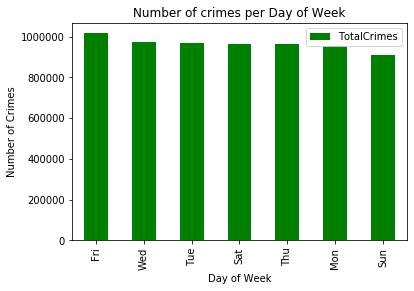

In [136]:
cp.sort_values('TotalCrimes', ascending = False).plot(kind = 'bar', color = "green", x = "DayOfWeek", y = "TotalCrimes")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.title("Number of crimes per Day of Week")